Cluster 1:
Nodes: baclofen: 0.74, topiramate: 0.74, salicylic acid: 0.72, gabapentin: 0.72, pregabalin: 0.71, tenamfetamine: 0.71, maprotiline: 0.71, amodiaquine: 0.71, dantrolene: 0.70, xanthine: 0.70, ergotamine: 0.69, tizanidine: 0.68
Average CoDReS Value: 0.70
Total Nodes: 12

Cluster 2:
Nodes: streptozocin: 0.84, levodopa: 0.84, dextromethorphan: 0.83, rizatriptan: 0.81, hexachlorophene: 0.80, olanzapine: 0.79
Average CoDReS Value: 0.80
Total Nodes: 6

Cluster 3:
Nodes: phosphoramidon: 0.36
Average CoDReS Value: 0.40
Total Nodes: 1

Cluster 4:
Nodes: staurosporine: 1.00
Average CoDReS Value: 1.00
Total Nodes: 1

Cluster 5:
Nodes: n-(3-propylcarbamoyloxirane-2-carbonyl)-isoleucyl-proline: 0.64, docetaxel: 0.60, vindesine: 0.59
Average CoDReS Value: 0.60
Total Nodes: 3

Cluster 6:
Nodes: propranolol: 0.93, nicotine: 0.90, fluorouracil: 0.85
Average CoDReS Value: 0.90
Total Nodes: 3



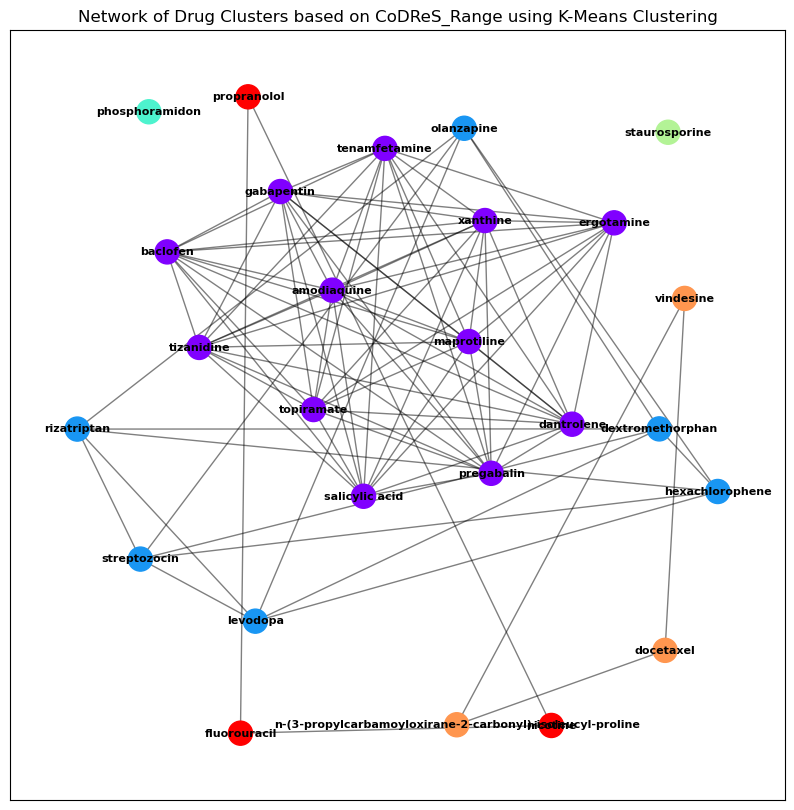

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import networkx as nx
import matplotlib.pyplot as plt

# Load the dataset
csv_path = '/Users/sandhyavenkataramaiah/Downloads/FinalSet.csv'  # Replace with your file path
df = pd.read_csv(csv_path)

# Apply K-Means clustering on CoDReS_Range
codres_range_values = df['CoDReS_Range'].values.reshape(-1, 1)
kmeans = KMeans(n_clusters=6, random_state=0, n_init=10).fit(codres_range_values)
labels = kmeans.labels_

# Create a mapping of drug nodes to their corresponding labels
label_mapping = dict(zip(df['Input Drug'], labels))

# Create a network graph
G = nx.Graph()
for drug, cluster in label_mapping.items():
    G.add_node(drug, cluster=cluster)

# Add edges connecting nodes within the same cluster
for node1 in G.nodes:
    for node2 in G.nodes:
        if node1 != node2 and label_mapping[node1] == label_mapping[node2]:
            G.add_edge(node1, node2)

# Define color map for nodes
color_map = plt.cm.rainbow  # You can use any colormap of your choice

# Draw the network graph
plt.figure(figsize=(10, 10))

# Specify the positions of nodes (spring_layout is used here, adjusting the scale and k parameters)
pos = nx.spring_layout(G, scale=200, k=2)  # Increase the value of k to increase the distance between nodes

# Draw nodes with colors and increased node size
nodes = nx.draw_networkx_nodes(G, pos, node_color=[label_mapping[node] for node in G.nodes], cmap=color_map, node_size=300)
nx.draw_networkx_labels(G, pos, font_size=8, font_color="black", font_weight="bold")

# Draw edges
nx.draw_networkx_edges(G, pos, alpha=0.5)

# Display information for each cluster
for cluster in range(6):
    cluster_nodes = [node for node, label in label_mapping.items() if label == cluster]
    cluster_codres_values = df[df['Input Drug'].isin(cluster_nodes)]['CoDReS_Range']
    cluster_codres_values1 = df[df['Input Drug'].isin(cluster_nodes)]['CoDReS']
    
    print(f"Cluster {cluster + 1}:")
    print(f"Nodes: {', '.join([f'{node}: {codres:.2f}' for node, codres in zip(cluster_nodes, cluster_codres_values1)])}")
    print(f"Average CoDReS Value: {cluster_codres_values.mean():.2f}")
    print(f"Total Nodes: {len(cluster_nodes)}\n")

plt.title('Network of Drug Clusters based on CoDReS_Range using K-Means Clustering')
plt.show()
